In [245]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt

create a df using pandas.DataFrame()  
Key arg:  
data → The actual information (values) inside the DataFrame. Can be a list, dictionary, NumPy array, or another DataFrame  
index → Names for the rows  
columns → Names for the columns  
dtype → Sets the data type of all values  
copy → If True, it creates a new copy of the data instead of modifying the original.  

In [246]:
# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [4]:
usa_jobs = df.copy()
usa_jobs['job_posted_month'] = usa_jobs['job_posted_date'].dt.strftime('%B')
usa_jobs = usa_jobs[usa_jobs['job_country'] == 'United States']


In [5]:
usa_table = pd.pivot_table(usa_jobs, index= usa_jobs['job_posted_month'], columns= usa_jobs['job_title_short'], aggfunc= 'size' )
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
usa_table.reindex(months)

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,527,36,8494,2655,6915,60,1544,773,1552,114
February,447,24,6124,3060,4956,56,1258,878,1127,90
March,438,19,6218,3183,4779,59,1114,829,1150,115
April,565,40,6049,2801,4867,51,1025,781,991,112
May,279,20,4993,2976,4377,49,839,746,914,90
June,446,32,5683,2893,4645,48,1009,812,1033,93
July,581,39,5201,2570,4876,65,883,747,1095,153
August,903,39,6634,3269,6318,68,1186,903,1515,194
September,897,50,4639,3224,4568,113,805,775,1014,228


In [6]:
#load dataset to merge 
df_US_software_pivot = pd.read_csv('https://lukeb.co/software_csv', index_col='job_posted_month')

df_US_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [8]:
df_usa_merged = usa_table.merge(df_US_software_pivot, on = 'job_posted_month')
df_usa_merged

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
April,565,40,6049,2801,4867,51,1025,781,991,112,14037,9209,7232,4220
August,903,39,6634,3269,6318,68,1186,903,1515,194,11571,8191,7413,4104
December,648,40,3979,2641,3472,119,601,689,752,212,14033,9232,6731,4367
February,447,24,6124,3060,4956,56,1258,878,1127,90,11456,9116,7298,4284
January,527,36,8494,2655,6915,60,1544,773,1552,114,13619,9827,5108,4348
July,581,39,5201,2570,4876,65,883,747,1095,153,11914,8061,6839,4344
June,446,32,5683,2893,4645,48,1009,812,1033,93,12003,8065,5902,4781
March,438,19,6218,3183,4779,59,1114,829,1150,115,11102,8178,5814,4159
May,279,20,4993,2976,4377,49,839,746,914,90,12126,8864,6718,4980


In [9]:
top_5 = df_usa_merged.sum().sort_values(ascending= False).head(5)
top_5

Front-End Developer     151067
Back-End Developer      104700
Full-Stack Developer     75873
Data Analyst             67816
Data Scientist           58830
dtype: int64

In [27]:
top_5 = list(top_5.index)
top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'Data Analyst',
 'Data Scientist']

In [31]:
df_usa_top_5 = df_usa_merged[top_5]
df_usa_top_5

,Front-End Developer,Back-End Developer,Full-Stack Developer,Data Analyst,Data Scientist
job_posted_month,,,,,
April,14037,9209,7232,6049,4867
August,11571,8191,7413,6634,6318
December,14033,9232,6731,3979,3472
February,11456,9116,7298,6124,4956
January,13619,9827,5108,8494,6915
July,11914,8061,6839,5201,4876
June,12003,8065,5902,5683,4645
March,11102,8178,5814,6218,4779
May,12126,8864,6718,4993,4377


<Figure size 1200x600 with 0 Axes>

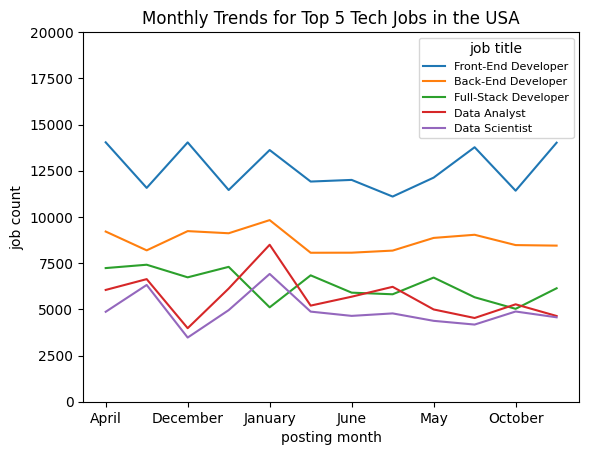

In [45]:
plt.figure(figsize=(12, 6))
df_usa_top_5.plot(kind= 'line')
plt.xlabel('posting month')
plt.ylabel('job count')
plt.title('Monthly Trends for Top 5 Tech Jobs in the USA')
plt.ylim(0, 20000)
plt.legend(loc='upper right', title= 'job title', fontsize= 8)
plt.show()

#CONCATENATE

In [22]:
df_conc_trial = df.copy()
df_conc_trial['job_posted_month'] = df_conc_trial['job_posted_date'].dt.strftime('%b')


In [23]:
months = df_conc_trial['job_posted_month'].unique()

In [24]:
monthly_df = {month:df_conc_trial[df_conc_trial['job_posted_month'] == month] for month in months}

In [25]:
df_q1 = pd.concat([monthly_df['Jan'], monthly_df['Feb'], monthly_df['Mar']], ignore_index= True)

#ways to save files
df_q1.to_clipboard
df_q1.to_csv
df_q1.to_excel  #remember to install openpyxl
df_q1.to_sql #remember to do from sqlalchemy import create_engine then run engine = create_engine('sqlite:///jobs.db')
df_q1.to_parquet and df_q1.to_pickle #used for quicker loading

APPLY METHOD


In [15]:
print(help(df_q1.apply))

Help on method apply in module pandas.core.frame:

apply(
    func: 'AggFuncType',
    axis: 'Axis' = 0,
    raw: 'bool' = False,
    result_type: "Literal['expand', 'reduce', 'broadcast'] | None" = None,
    args=(),
    by_row: "Literal[False, 'compat']" = 'compat',
    engine: "Literal['python', 'numba']" = 'python',
    engine_kwargs: 'dict[str, bool] | None' = None,
    **kwargs
) method of pandas.core.frame.DataFrame instance
    Apply a function along an axis of the DataFrame.

    Objects passed to the function are Series objects whose index is
    either the DataFrame's index (``axis=0``) or the DataFrame's columns
    (``axis=1``). By default (``result_type=None``), the final return type
    is inferred from the return type of the applied function. Otherwise,
    it depends on the `result_type` argument.

    Parameters
    ----------
    func : function
        Function to apply to each column or row.
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Axis along wh

In [11]:
df_salary = df_q1.copy()
df_salary_no_null = df_salary[df_salary['salary_year_avg'].notna()]

def projected_salary(salary):
    return salary * 1.03

df_salary_no_null['salary_inflated'] = df_salary_no_null['salary_year_avg'].apply(projected_salary)


C:\Users\user\AppData\Local\Temp\ipykernel_11712\1846255073.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salary_no_null['salary_inflated'] = df_salary_no_null['salary_year_avg'].apply(projected_salary)


In [13]:
df_salary_no_null[['salary_inflated', 'salary_year_avg']]

,salary_inflated,salary_year_avg
36,137283.55,133285.0
55,82400.00,80000.0
109,92700.00,90000.0
149,191065.00,185500.0
222,144200.00,140000.0
...,...,...
220391,151925.00,147500.0
220397,101455.00,98500.0
220399,58401.00,56700.0
220403,91773.00,89100.0


In [26]:
print(df_q1['job_skills'][0])
print(type(df_q1['job_skills'][0]))


['r', 'python', 'sql', 'nosql', 'power bi', 'tableau']
<class 'str'>


In [40]:
import ast

def clean_list(skill_list):
    if pd.notna(skill_list):
        return ast.literal_eval(skill_list)
df['job_skills'] = df['job_skills'].apply(clean_list)
print(df['job_skills'][0])
print(type(df['job_skills'][0]))


None
<class 'NoneType'>


In [31]:
df['job_skills'] =df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)
print(df_q1['job_skills'][0])
print(type(df_q1['job_skills'][0]))

['r', 'python', 'sql', 'nosql', 'power bi', 'tableau']
<class 'list'>


In [33]:
def projected_salary_rowise(row):
    if "Senior" in row['job_title_short']:
        return 1.05 * row['salary_year_avg']
    else:
        return 1.03 * row['salary_year_avg']
    
df_salary_no_null['salary_year_inflated'] = df_salary_no_null.apply(projected_salary_rowise, axis= 1)
df_salary_no_null[['job_title_short', 'salary_year_avg', 'salary_year_inflated']]

C:\Users\user\AppData\Local\Temp\ipykernel_13780\1911680477.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_salary_no_null['salary_year_inflated'] = df_salary_no_null.apply(projected_salary_rowise, axis= 1)


,job_title_short,salary_year_avg,salary_year_inflated
36,Data Analyst,133285.0,137283.55
55,Data Engineer,80000.0,82400.00
109,Senior Data Analyst,90000.0,94500.00
149,Machine Learning Engineer,185500.0,191065.00
222,Data Engineer,140000.0,144200.00
...,...,...,...
220391,Senior Data Engineer,147500.0,154875.00
220397,Data Analyst,98500.0,101455.00
220399,Data Analyst,56700.0,58401.00
220403,Cloud Engineer,89100.0,91773.00


EXPLODE METHOD

In [41]:
df_exploded = df.explode('job_skills')
df_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kafka,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kubernetes,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,docker,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Trigyn,aws,"{'cloud': ['aws'], 'other': ['flow']}"


In [19]:
top_10 = df_exploded['job_skills'].value_counts().head(10)

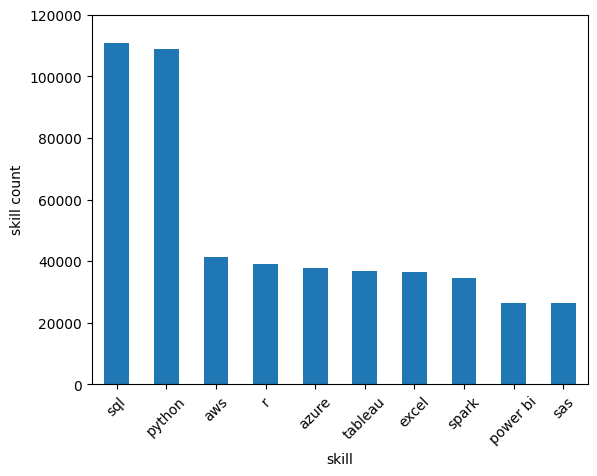

In [23]:
top_10.plot(kind='bar')
plt.ylim(0,120000)
plt.xticks(rotation= 45)
plt.ylabel('skill count')
plt.xlabel('skill')
plt.show()

In [42]:
skills_count = df_exploded.groupby(['job_title_short', 'job_skills']).size() #returns a series
df_skills_count = skills_count.reset_index(name= 'skill_count')  #converts the series into a df
df_skills_count

,job_title_short,job_skills,skill_count
0,Business Analyst,airflow,318
1,Business Analyst,airtable,17
2,Business Analyst,alteryx,1078
3,Business Analyst,angular,87
4,Business Analyst,ansible,120
...,...,...,...
2251,Software Engineer,wrike,4
2252,Software Engineer,wsl,13
2253,Software Engineer,xamarin,35
2254,Software Engineer,yarn,145


In [45]:
df_skills_count = df_skills_count.sort_values('skill_count', ascending= False)

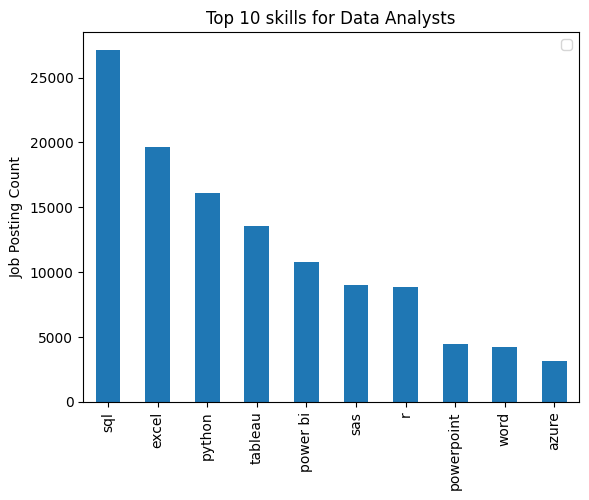

In [31]:
job_title = 'Data Analyst'
top_skills = 10

df_skills_DA = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)
df_skills_DA.plot(kind= 'bar', x= 'job_skills', y= 'skill_count')
plt.title(f'Top {top_skills} skills for {job_title}s')
plt.xlabel('')
plt.ylabel('Job Posting Count')
plt.legend('')
plt.show()

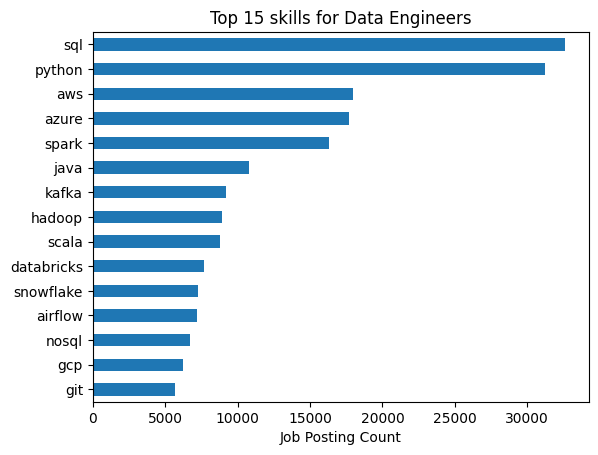

In [32]:
job_title = 'Data Engineer'
top_skills = 15

df_skills_DE = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)
df_skills_DE.plot(kind= 'barh', x= 'job_skills', y= 'skill_count')
plt.gca().invert_yaxis()
plt.title(f'Top {top_skills} skills for {job_title}s')
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()

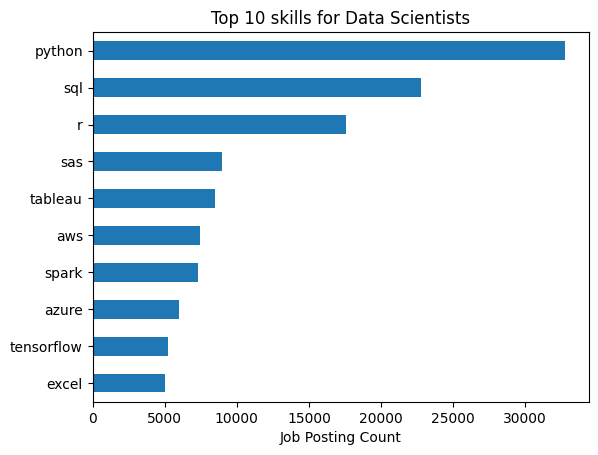

In [34]:
job_title = 'Data Scientist'
top_skills = 10

df_skills_DE = df_skills_count[df_skills_count['job_title_short'] == job_title].head(top_skills)
df_skills_DE.plot(kind= 'barh', x= 'job_skills', y= 'skill_count')
plt.gca().invert_yaxis()
plt.title(f'Top {top_skills} skills for {job_title}s')
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.legend().set_visible(False)
plt.show()

MATPLOTLIB SUBPLOTS

In [7]:
df['job_title_short'].value_counts()

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

In [9]:
df['job_schedule_type'].value_counts().head()

job_schedule_type
Full-time                  701727
Contractor                  34793
Internship                   8742
Part-time                    7881
Full-time and Part-time      6287
Name: count, dtype: int64

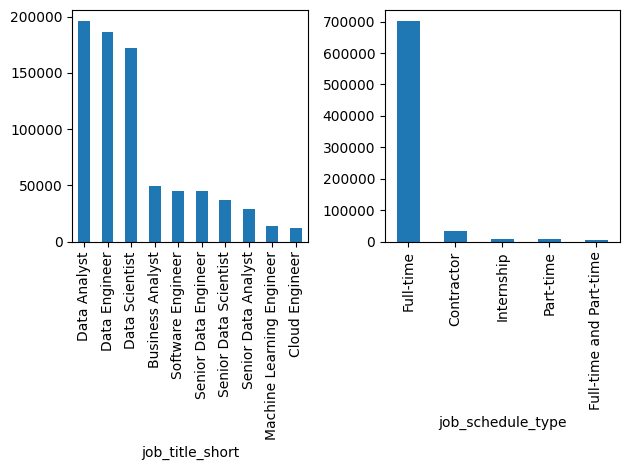

In [20]:
fig, ax = plt.subplots(nrows= 1, ncols= 2)
df['job_title_short'].value_counts().plot(kind= 'bar', ax= ax[0])
df['job_schedule_type'].value_counts().head().plot(kind= 'bar', ax= ax[1])
plt.tight_layout()


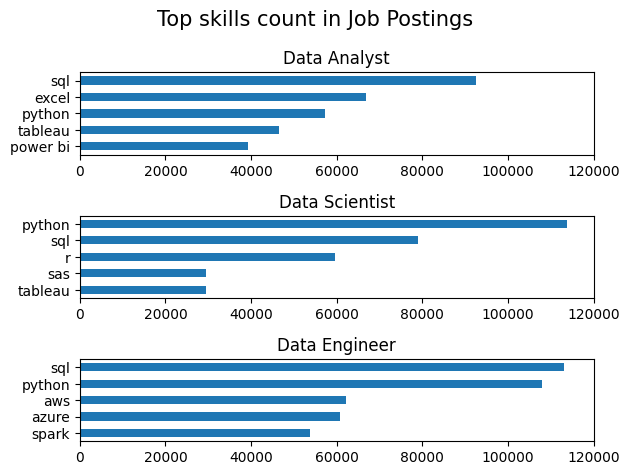

In [74]:
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

fig, ax = plt.subplots(3, 1)
for index, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head()
    df_plot.plot(kind= 'barh', y = 'skill_count', x = 'job_skills', ax = ax[index], title= job_title)
    ax[index].legend().set_visible(False)
    ax[index].invert_yaxis()
    ax[index].set_ylabel('')
    ax[index].set_xlim(0, 120000)
    #ax[index].set_xlim(0, 200,000)
fig.suptitle('Top skills count in Job Postings', fontsize= 15)
fig.tight_layout()


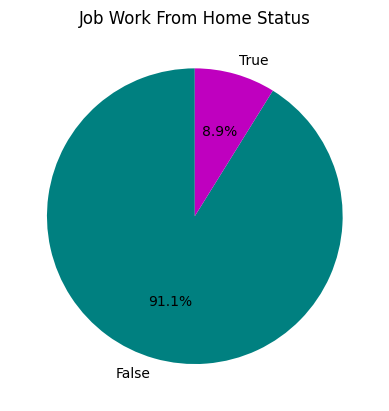

In [ ]:
#doc.python.org/3/library/string.html to see the accepted formatting
df['job_work_from_home'].value_counts().plot(kind= 'pie', autopct='%1.1f%%',  startangle=90, colors=['teal', 'm'])
plt.title('Job Work From Home Status')
plt.ylabel('')
plt.show()

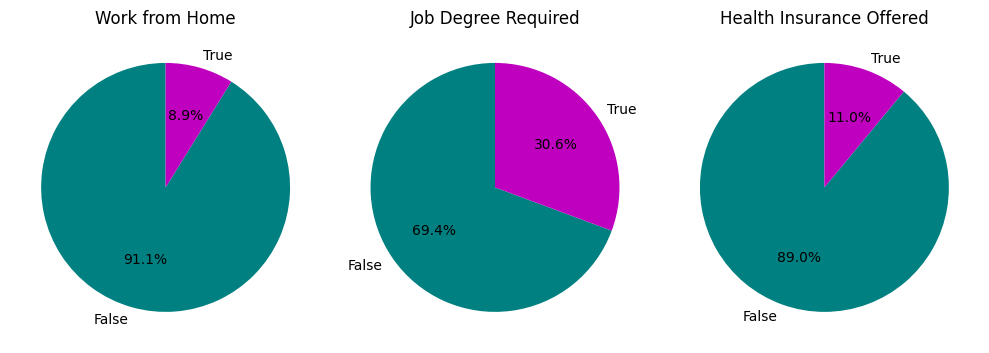

In [141]:
fig, ax = plt.subplots(1, 3)

dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Required',
    'job_health_insurance': 'Health Insurance Offered'
}

#df[dict_column]

for index, item in enumerate(dict_column.items()):  #can use index, (column, title)
    df_plot = df[item[0]].value_counts()
    df_plot.plot(kind= 'pie',  ax = ax[index], autopct='%1.1f%%', figsize= (10,5),  startangle=90, colors=['teal', 'm'], title= item[1])
    ax[index].set_ylabel('')
fig.tight_layout()


Exercise: Salary vs Count of Top Skills in Data Analyst Jobs (SCATTERPLOTS)

In [184]:
import ast

df_DA = df.copy()
df_analyst =df_DA[df_DA['job_title_short']== "Data Analyst"]

def clean_list(skill_list):
    if pd.notna(skill_list):
        return ast.literal_eval(skill_list)
df_analyst['job_skills'] = df_analyst['job_skills'].apply(clean_list)
df_analyst = df_analyst.explode('job_skills')

C:\Users\user\AppData\Local\Temp\ipykernel_17348\2883781891.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analyst['job_skills'] = df_analyst['job_skills'].apply(clean_list)


In [187]:
num = 20
df_count= list((df_analyst['job_skills'].value_counts().head(num)).index)
df_final = df_analyst[df_analyst['job_skills'].isin(df_count)]
df_final = df_final.groupby('job_skills').agg(
    skill_count=('job_skills', 'size'),
    median_salary=('salary_year_avg', 'median')
)
df_final

,skill_count,median_salary
job_skills,,
aws,9047,100500.000000
azure,10913,100000.000000
excel,66860,84479.000000
flow,7259,94450.000000
go,7905,90000.000000
looker,6259,104000.000000
oracle,10387,95000.000000
power bi,39380,90000.000000
powerpoint,13822,85000.000000


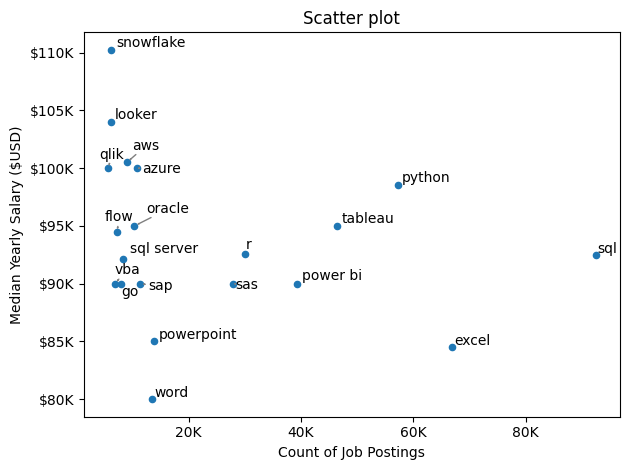

In [202]:
#install adjustText
from adjustText import adjust_text

df_final.plot(kind= 'scatter', x= 'skill_count', y= 'median_salary')

texts= []

for i, txt in enumerate(df_final.index):
    texts.append(plt.text(df_final['skill_count'].iloc[i], df_final['median_salary'].iloc[i], txt))
adjust_text(texts, arrowprops= dict(arrowstyle= "->", color= 'gray', lw=1))
ax= plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K"))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"{int(x/1000)}K"))

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title('Scatter plot')
plt.tight_layout()
#LINEWIDTH, linestyle, colormap, markers, markersize, figsize
plt.show()

HISTOGRAMS

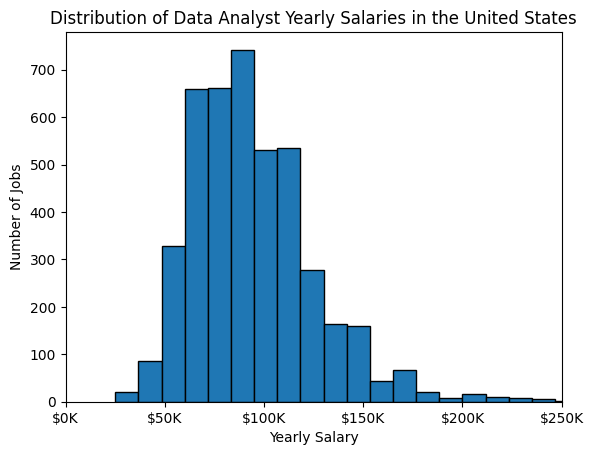

In [215]:
df_DA = df.copy()
df_analyst_USA = df_DA[(df_DA['job_title_short'] == "Data Analyst") & (df_DA['job_country'] == "United States")]
df_analyst_USA['salary_year_avg'].plot(kind= 'hist', bins=30, edgecolor= 'black')
ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f"${int(y/1000)}K"))
plt.xlim(0, 250000)
plt.title('Distribution of Data Analyst Yearly Salaries in the United States')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()

BOX PLOTS
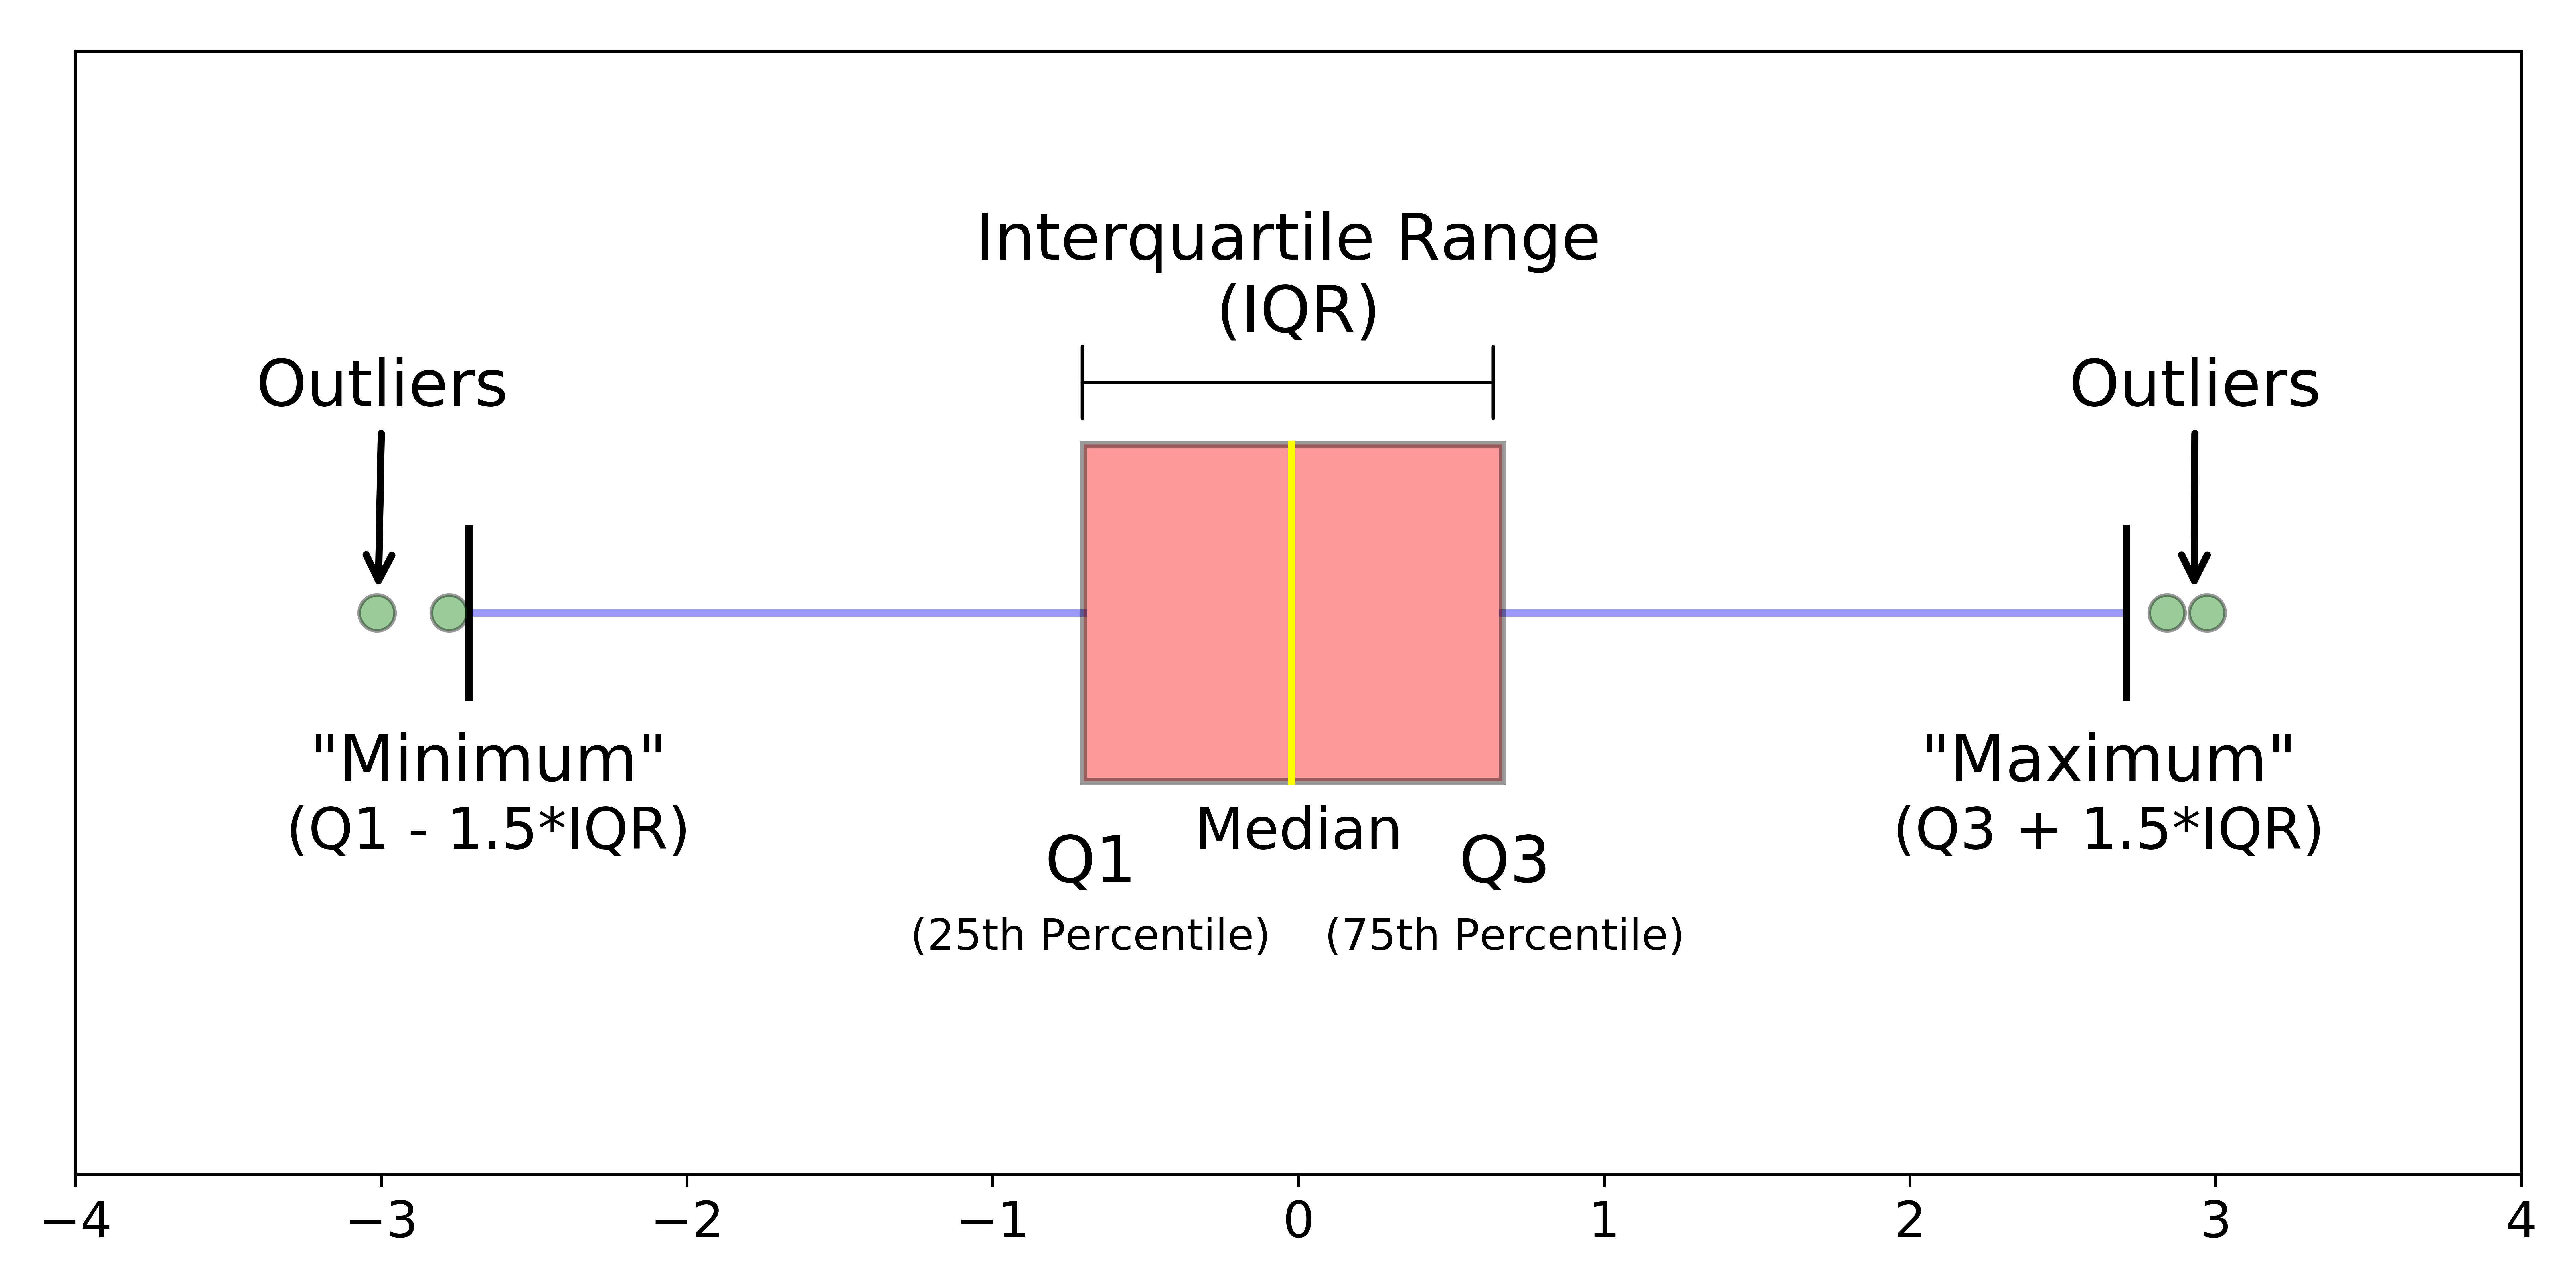

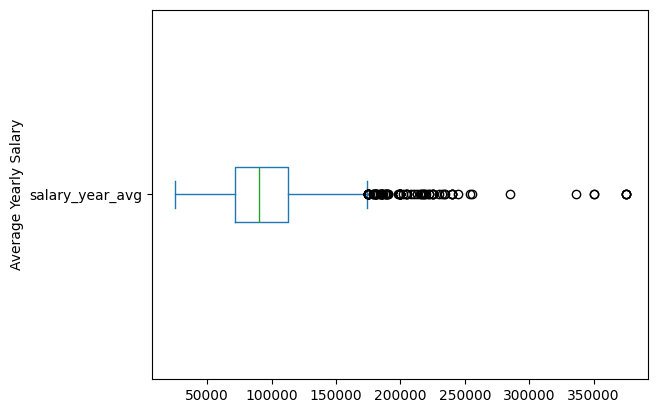

In [ ]:
df_analyst_USA = df_analyst_USA.dropna(subset= ['salary_year_avg'])
df_analyst_USA['salary_year_avg'].plot(kind= 'box', vert= False)
plt.ylabel('Average Yearly Salary')
plt.show()

"""
# plot histogram and boxplot for df_DA_US['salary_year_avg'] on same figure

fig, ax = plt.subplots(2, 1)
fig.tight_layout(h_pad=1)

df_DA_US['salary_year_avg'].plot(kind='hist', ax=ax[0], bins=30, edgecolor='black')
ax[0].set_title('Salary Distributions for Data Analyst in the US')
ax[0].set_xlabel('')
ax[0].set_ylabel('Frequency')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '${0:g}k'.format(x/1000)))
# lines
ax[0].axvline(df_DA_US['salary_year_avg'].median(), color='r', linestyle='--')
ax[0].axvline(df_DA_US['salary_year_avg'].quantile(0.25), color='y', linestyle='--')
ax[0].axvline(df_DA_US['salary_year_avg'].quantile(0.75), color='y', linestyle='--')
ax[0].legend(['', 'Median', 'Q1 & Q3'])


df_DA_US['salary_year_avg'].plot(kind='box', ax=ax[1], vert=False)
ax[1].set_yticklabels('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: '${0:g}k'.format(x/1000)))
# lines
ax[1].axvline(df_DA_US['salary_year_avg'].median(), color='r', linestyle='--')
ax[1].axvline(df_DA_US['salary_year_avg'].quantile(0.25), color='y', linestyle='--')
ax[1].axvline(df_DA_US['salary_year_avg'].quantile(0.75), color='y', linestyle='--')
plt.show()
"""

In [227]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_USA = df.copy()
df_US = df_USA[(df_USA['job_title_short'].isin(job_titles)) & (df_USA['job_country'] == 'United States')]
df_US = df_US.dropna(subset= ['salary_year_avg'])


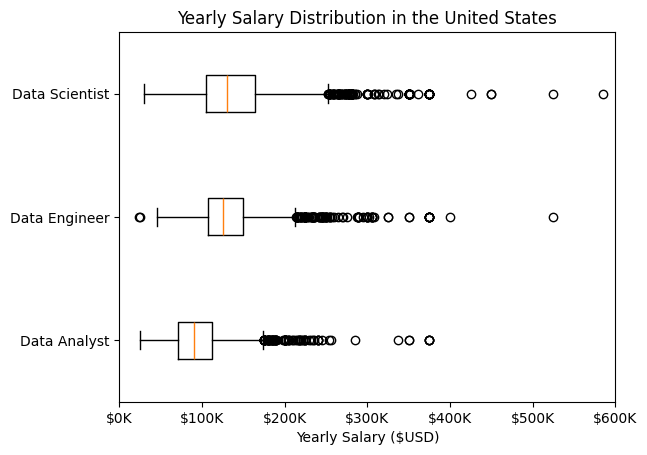

In [234]:
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, tick_labels=job_titles, vert=False)
plt.title('Yearly Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
plt.xlim(0, 600000)
plt.show()

EXERCISE

In [236]:
import ast

df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df_USA = df.copy()
df_analyst_US = df_USA[(df_USA['job_title_short']== 'Data Analyst') & (df_USA['job_country'] == 'United States')]


df_analyst_US = df_analyst_US.explode('job_skills')

In [238]:
df_DA_top_pay = df_analyst_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)
df_DA_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [243]:
df_DA_skills = df_analyst_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


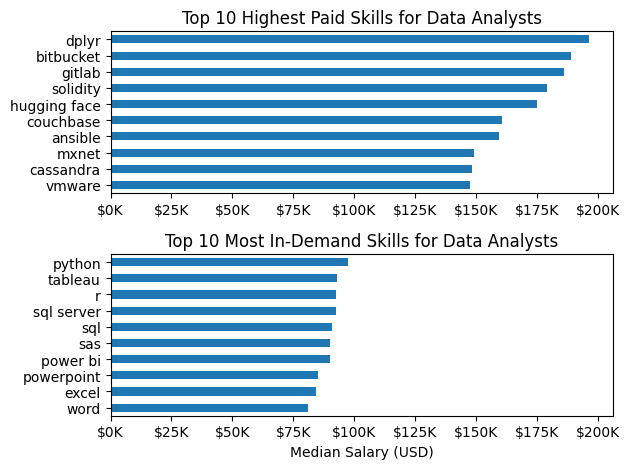

In [244]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts
df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

SEABORN LIBRARY

In [247]:
import seaborn as sns

In [250]:
df_analyst_US = df[(df['job_title_short']== 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_analyst_US['job_skills'] = df_analyst_US['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)
df_analyst_US = df_analyst_US.dropna(subset= ['salary_year_avg'])


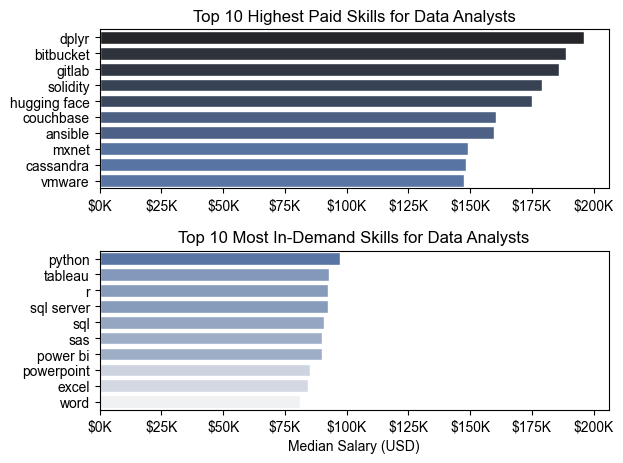

In [256]:
fig, ax = plt.subplots(2, 1)  
sns.set_theme(style='ticks')
# Top 10 Highest Paid Skills for Data Analysts
#df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
sns.barplot(data= df_DA_top_pay, x= 'median', y= df_DA_top_pay.index, ax=ax[0], hue= 'median', palette= 'dark:b_r', legend= False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts
#df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
sns.barplot(data= df_DA_skills, x= 'median', y= df_DA_skills.index, ax=ax[1], hue= 'median', palette= 'light:b', legend= False)
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

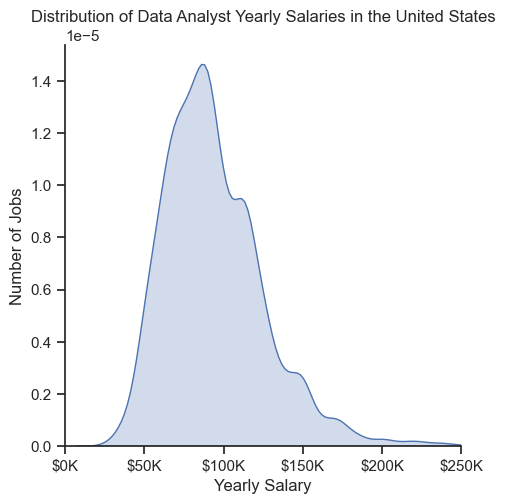

In [267]:
sns.displot(data= df_analyst_US['salary_year_avg'], kind= 'kde', fill= True)
ax= plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
plt.xlim(0, 250000)
plt.title('Distribution of Data Analyst Yearly Salaries in the United States')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()

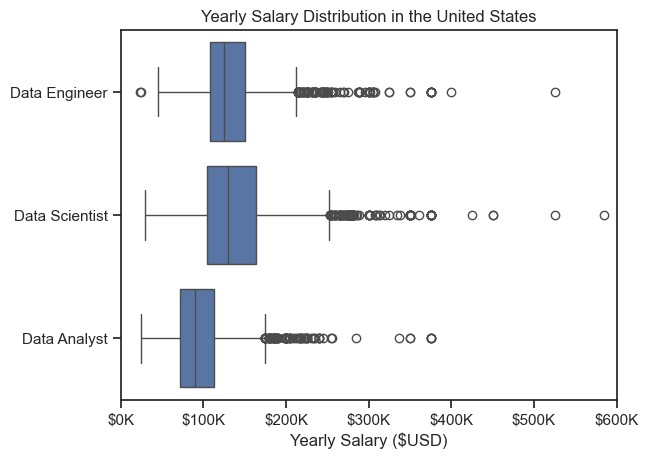

In [270]:
sns.boxplot(data= df_US, x='salary_year_avg', y='job_title_short')

plt.title('Yearly Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f"${int(x/1000)}K"))
plt.xlim(0, 600000)
plt.show()